# Glass Identification Project

In [218]:
#Importing Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy as stats

import warnings
warnings.filterwarnings("ignore")

In [219]:
#Loading the data
gi=pd.read_csv("glassidentification.csv")
gi

,Id number,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type of glass
0,1,1.52101,13.64,4.49,1.10,71.78,0.06,8.75,0.00,0.0,1
1,2,1.51761,13.89,3.60,1.36,72.73,0.48,7.83,0.00,0.0,1
2,3,1.51618,13.53,3.55,1.54,72.99,0.39,7.78,0.00,0.0,1
3,4,1.51766,13.21,3.69,1.29,72.61,0.57,8.22,0.00,0.0,1
4,5,1.51742,13.27,3.62,1.24,73.08,0.55,8.07,0.00,0.0,1
...,...,...,...,...,...,...,...,...,...,...,...
209,210,1.51623,14.14,0.00,2.88,72.61,0.08,9.18,1.06,0.0,7
210,211,1.51685,14.92,0.00,1.99,73.06,0.00,8.40,1.59,0.0,7
211,212,1.52065,14.36,0.00,2.02,73.42,0.00,8.44,1.64,0.0,7
212,213,1.51651,14.38,0.00,1.94,73.61,0.00,8.48,1.57,0.0,7


The data shows that the chemical composition of the glass samples varies, and that this variation can affect the refractive index.

In [220]:
gi.keys()

Index(['Id number', 'RI', 'Na', 'Mg', 'Al', 'Si', 'K', 'Ca', 'Ba', 'Fe',
       'Type of glass'],
      dtype='object')

In [221]:
gi.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 214 entries, 0 to 213
Data columns (total 11 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id number      214 non-null    int64  
 1   RI             214 non-null    float64
 2   Na             214 non-null    float64
 3   Mg             214 non-null    float64
 4   Al             214 non-null    float64
 5   Si             214 non-null    float64
 6   K              214 non-null    float64
 7   Ca             214 non-null    float64
 8   Ba             214 non-null    float64
 9   Fe             214 non-null    float64
 10  Type of glass  214 non-null    int64  
dtypes: float64(9), int64(2)
memory usage: 18.5 KB


In [222]:
gi.dtypes

Id number          int64
RI               float64
Na               float64
Mg               float64
Al               float64
Si               float64
K                float64
Ca               float64
Ba               float64
Fe               float64
Type of glass      int64
dtype: object

#Observation: There are two integer dtypes and nine float dtypes

In [223]:
gi.describe()

,Id number,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type of glass
count,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000
mean,107.500000,1.518365,13.407850,2.684533,1.444907,72.650935,0.497056,8.956963,0.175047,0.057009,2.780374
std,61.920648,0.003037,0.816604,1.442408,0.499270,0.774546,0.652192,1.423153,0.497219,0.097439,2.103739
min,1.000000,1.511150,10.730000,0.000000,0.290000,69.810000,0.000000,5.430000,0.000000,0.000000,1.000000
25%,54.250000,1.516522,12.907500,2.115000,1.190000,72.280000,0.122500,8.240000,0.000000,0.000000,1.000000
50%,107.500000,1.517680,13.300000,3.480000,1.360000,72.790000,0.555000,8.600000,0.000000,0.000000,2.000000
75%,160.750000,1.519157,13.825000,3.600000,1.630000,73.087500,0.610000,9.172500,0.000000,0.100000,3.000000
max,214.000000,1.533930,17.380000,4.490000,3.500000,75.410000,6.210000,16.190000,3.150000,0.510000,7.000000


Columns:
Id number: A unique identifier for each sample.
RI: The refractive index of the sample.
Na, Mg, Al, Si, K, Ca, Ba, Fe: The weight percent of each element (oxide) in the glass sample. These elements are likely present in the form of metal oxides, such as sodium oxide (Na2O), magnesium oxide (MgO), etc.
Type of glass: The type of glass the sample belongs to. The table shows types 1 through 7, but only defines types 1 through 5.
Type 1: building_windows_float_processed
Type 2: building_windows_non_float_processed
Type 3: vehicle_windows_float_processed
Type 4: vehicle_windows_non_float_processed (not shown in this data set)
Type 5: containers
Type 6: tableware (not defined in the data provided with the image)
Type 7: headlamps (not defined in the data provided with the image)
Rows:
Each row represents a single glass sample.
There are statistics (count, mean, standard deviation, min, 25th percentile, 50th percentile, 75th percentile, and max) for each column.

In [224]:
gi.shape

(214, 11)

In [225]:
gi.head()

,Id number,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type of glass
0,1,1.52101,13.64,4.49,1.10,71.78,0.06,8.75,0.0,0.0,1
1,2,1.51761,13.89,3.60,1.36,72.73,0.48,7.83,0.0,0.0,1
2,3,1.51618,13.53,3.55,1.54,72.99,0.39,7.78,0.0,0.0,1
3,4,1.51766,13.21,3.69,1.29,72.61,0.57,8.22,0.0,0.0,1
4,5,1.51742,13.27,3.62,1.24,73.08,0.55,8.07,0.0,0.0,1


In [226]:
gi.tail()

,Id number,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type of glass
209,210,1.51623,14.14,0.0,2.88,72.61,0.08,9.18,1.06,0.0,7
210,211,1.51685,14.92,0.0,1.99,73.06,0.00,8.40,1.59,0.0,7
211,212,1.52065,14.36,0.0,2.02,73.42,0.00,8.44,1.64,0.0,7
212,213,1.51651,14.38,0.0,1.94,73.61,0.00,8.48,1.57,0.0,7
213,214,1.51711,14.23,0.0,2.08,73.36,0.00,8.62,1.67,0.0,7


# Exploratory Data Analysis

In [227]:
gi.isnull().sum()

Id number        0
RI               0
Na               0
Mg               0
Al               0
Si               0
K                0
Ca               0
Ba               0
Fe               0
Type of glass    0
dtype: int64

<Axes: >

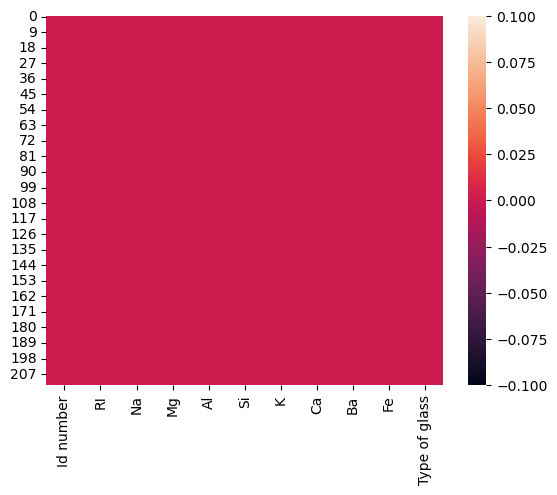

In [228]:
sns.heatmap(gi.isnull())

In [229]:
gi.skew()

Id number        0.000000
RI               1.625431
Na               0.454181
Mg              -1.152559
Al               0.907290
Si              -0.730447
K                6.551648
Ca               2.047054
Ba               3.416425
Fe               1.754327
Type of glass    1.114915
dtype: float64

In [230]:
gi.corr()

,Id number,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type of glass
Id number,1.000000,-0.072209,0.375722,-0.650328,0.490113,0.061232,0.003149,0.090800,0.451001,-0.072794,0.877357
RI,-0.072209,1.000000,-0.191885,-0.122274,-0.407326,-0.542052,-0.289833,0.810403,-0.000386,0.143010,-0.164237
Na,0.375722,-0.191885,1.000000,-0.273732,0.156794,-0.069809,-0.266087,-0.275442,0.326603,-0.241346,0.502898
Mg,-0.650328,-0.122274,-0.273732,1.000000,-0.481799,-0.165927,0.005396,-0.443750,-0.492262,0.083060,-0.744993
Al,0.490113,-0.407326,0.156794,-0.481799,1.000000,-0.005524,0.325958,-0.259592,0.479404,-0.074402,0.598829
Si,0.061232,-0.542052,-0.069809,-0.165927,-0.005524,1.000000,-0.193331,-0.208732,-0.102151,-0.094201,0.151565
K,0.003149,-0.289833,-0.266087,0.005396,0.325958,-0.193331,1.000000,-0.317836,-0.042618,-0.007719,-0.010054
Ca,0.090800,0.810403,-0.275442,-0.443750,-0.259592,-0.208732,-0.317836,1.000000,-0.112841,0.124968,0.000952
Ba,0.451001,-0.000386,0.326603,-0.492262,0.479404,-0.102151,-0.042618,-0.112841,1.000000,-0.058692,0.575161
Fe,-0.072794,0.143010,-0.241346,0.083060,-0.074402,-0.094201,-0.007719,0.124968,-0.058692,1.000000,-0.188278


<Axes: >

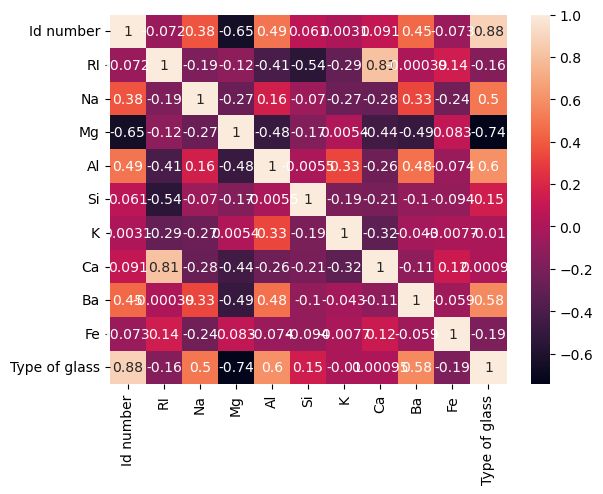

In [273]:
sns.heatmap(gi.corr(),annot=True)

# Visualization

<Axes: xlabel='RI', ylabel='Type of glass'>

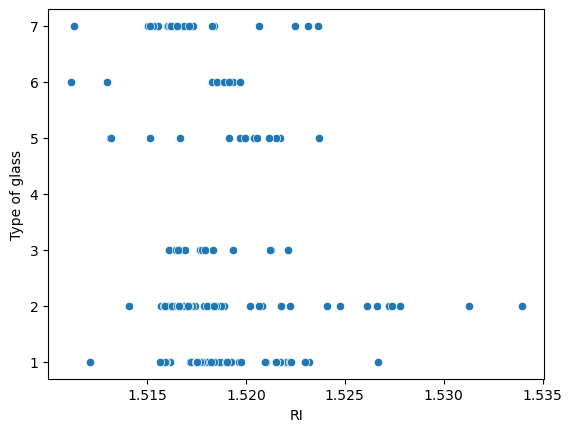

In [231]:
sns.scatterplot(data=gi, x='RI', y='Type of glass')

<Axes: xlabel='Na', ylabel='Type of glass'>

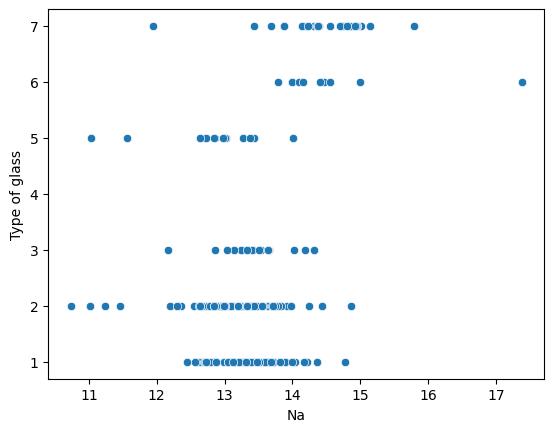

In [232]:
sns.scatterplot(data=gi, x='Na', y='Type of glass')

<Axes: xlabel='Mg', ylabel='Type of glass'>

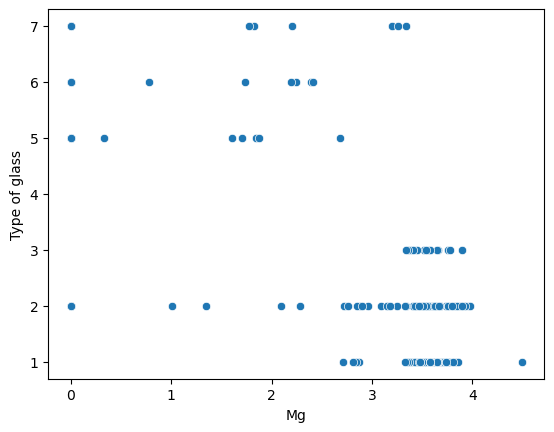

In [233]:
sns.scatterplot(data=gi, x='Mg', y='Type of glass')

<Axes: xlabel='Al', ylabel='Type of glass'>

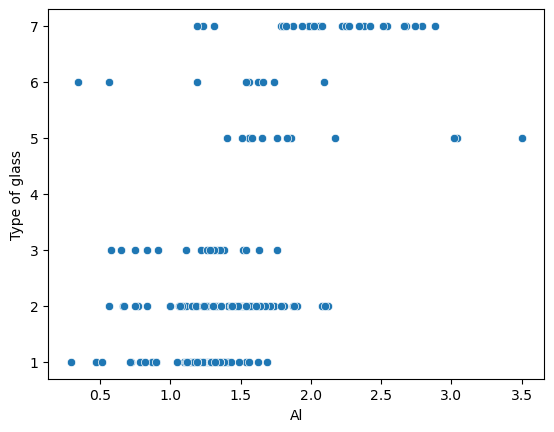

In [234]:
sns.scatterplot(data=gi, x='Al', y='Type of glass')

<Axes: xlabel='Si', ylabel='Type of glass'>

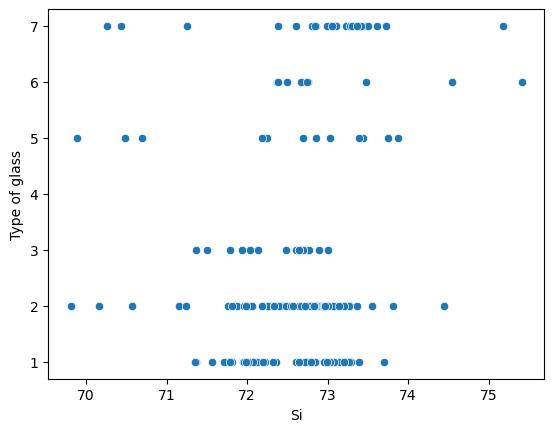

In [235]:
sns.scatterplot(data=gi, x='Si', y='Type of glass')

<Axes: xlabel='K', ylabel='Type of glass'>

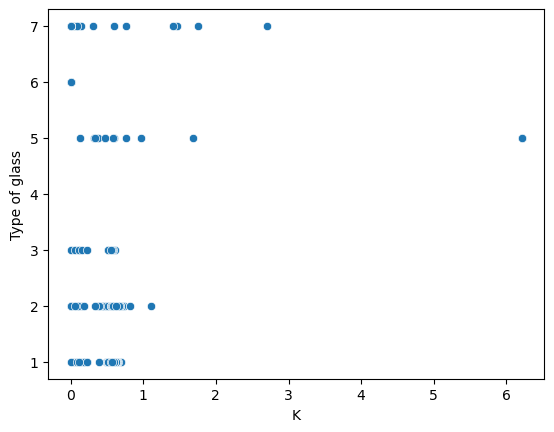

In [236]:
sns.scatterplot(data=gi, x='K', y='Type of glass')

<Axes: xlabel='Ca', ylabel='Type of glass'>

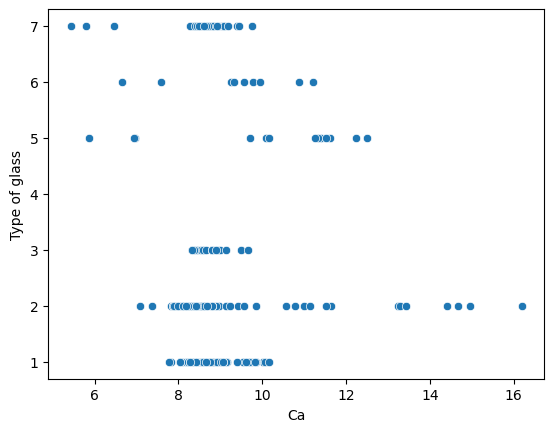

In [237]:
sns.scatterplot(data=gi, x='Ca', y='Type of glass')

<Axes: xlabel='Ba', ylabel='Type of glass'>

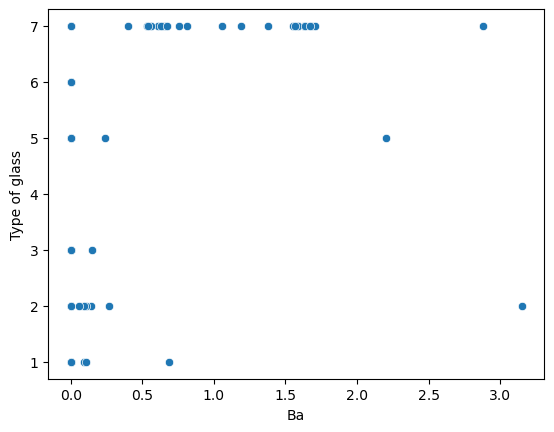

In [238]:
sns.scatterplot(data=gi, x='Ba', y='Type of glass')

<Axes: xlabel='Fe', ylabel='Type of glass'>

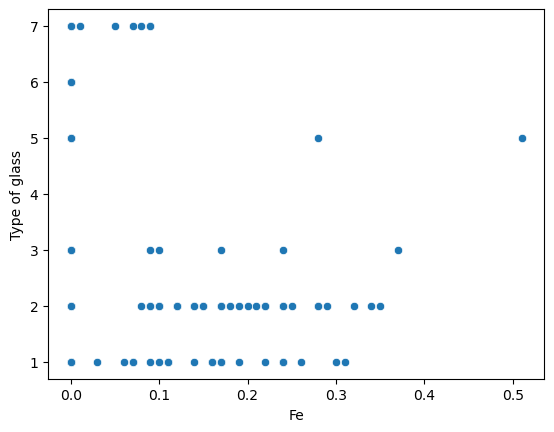

In [239]:
sns.scatterplot(data=gi, x='Fe', y='Type of glass')

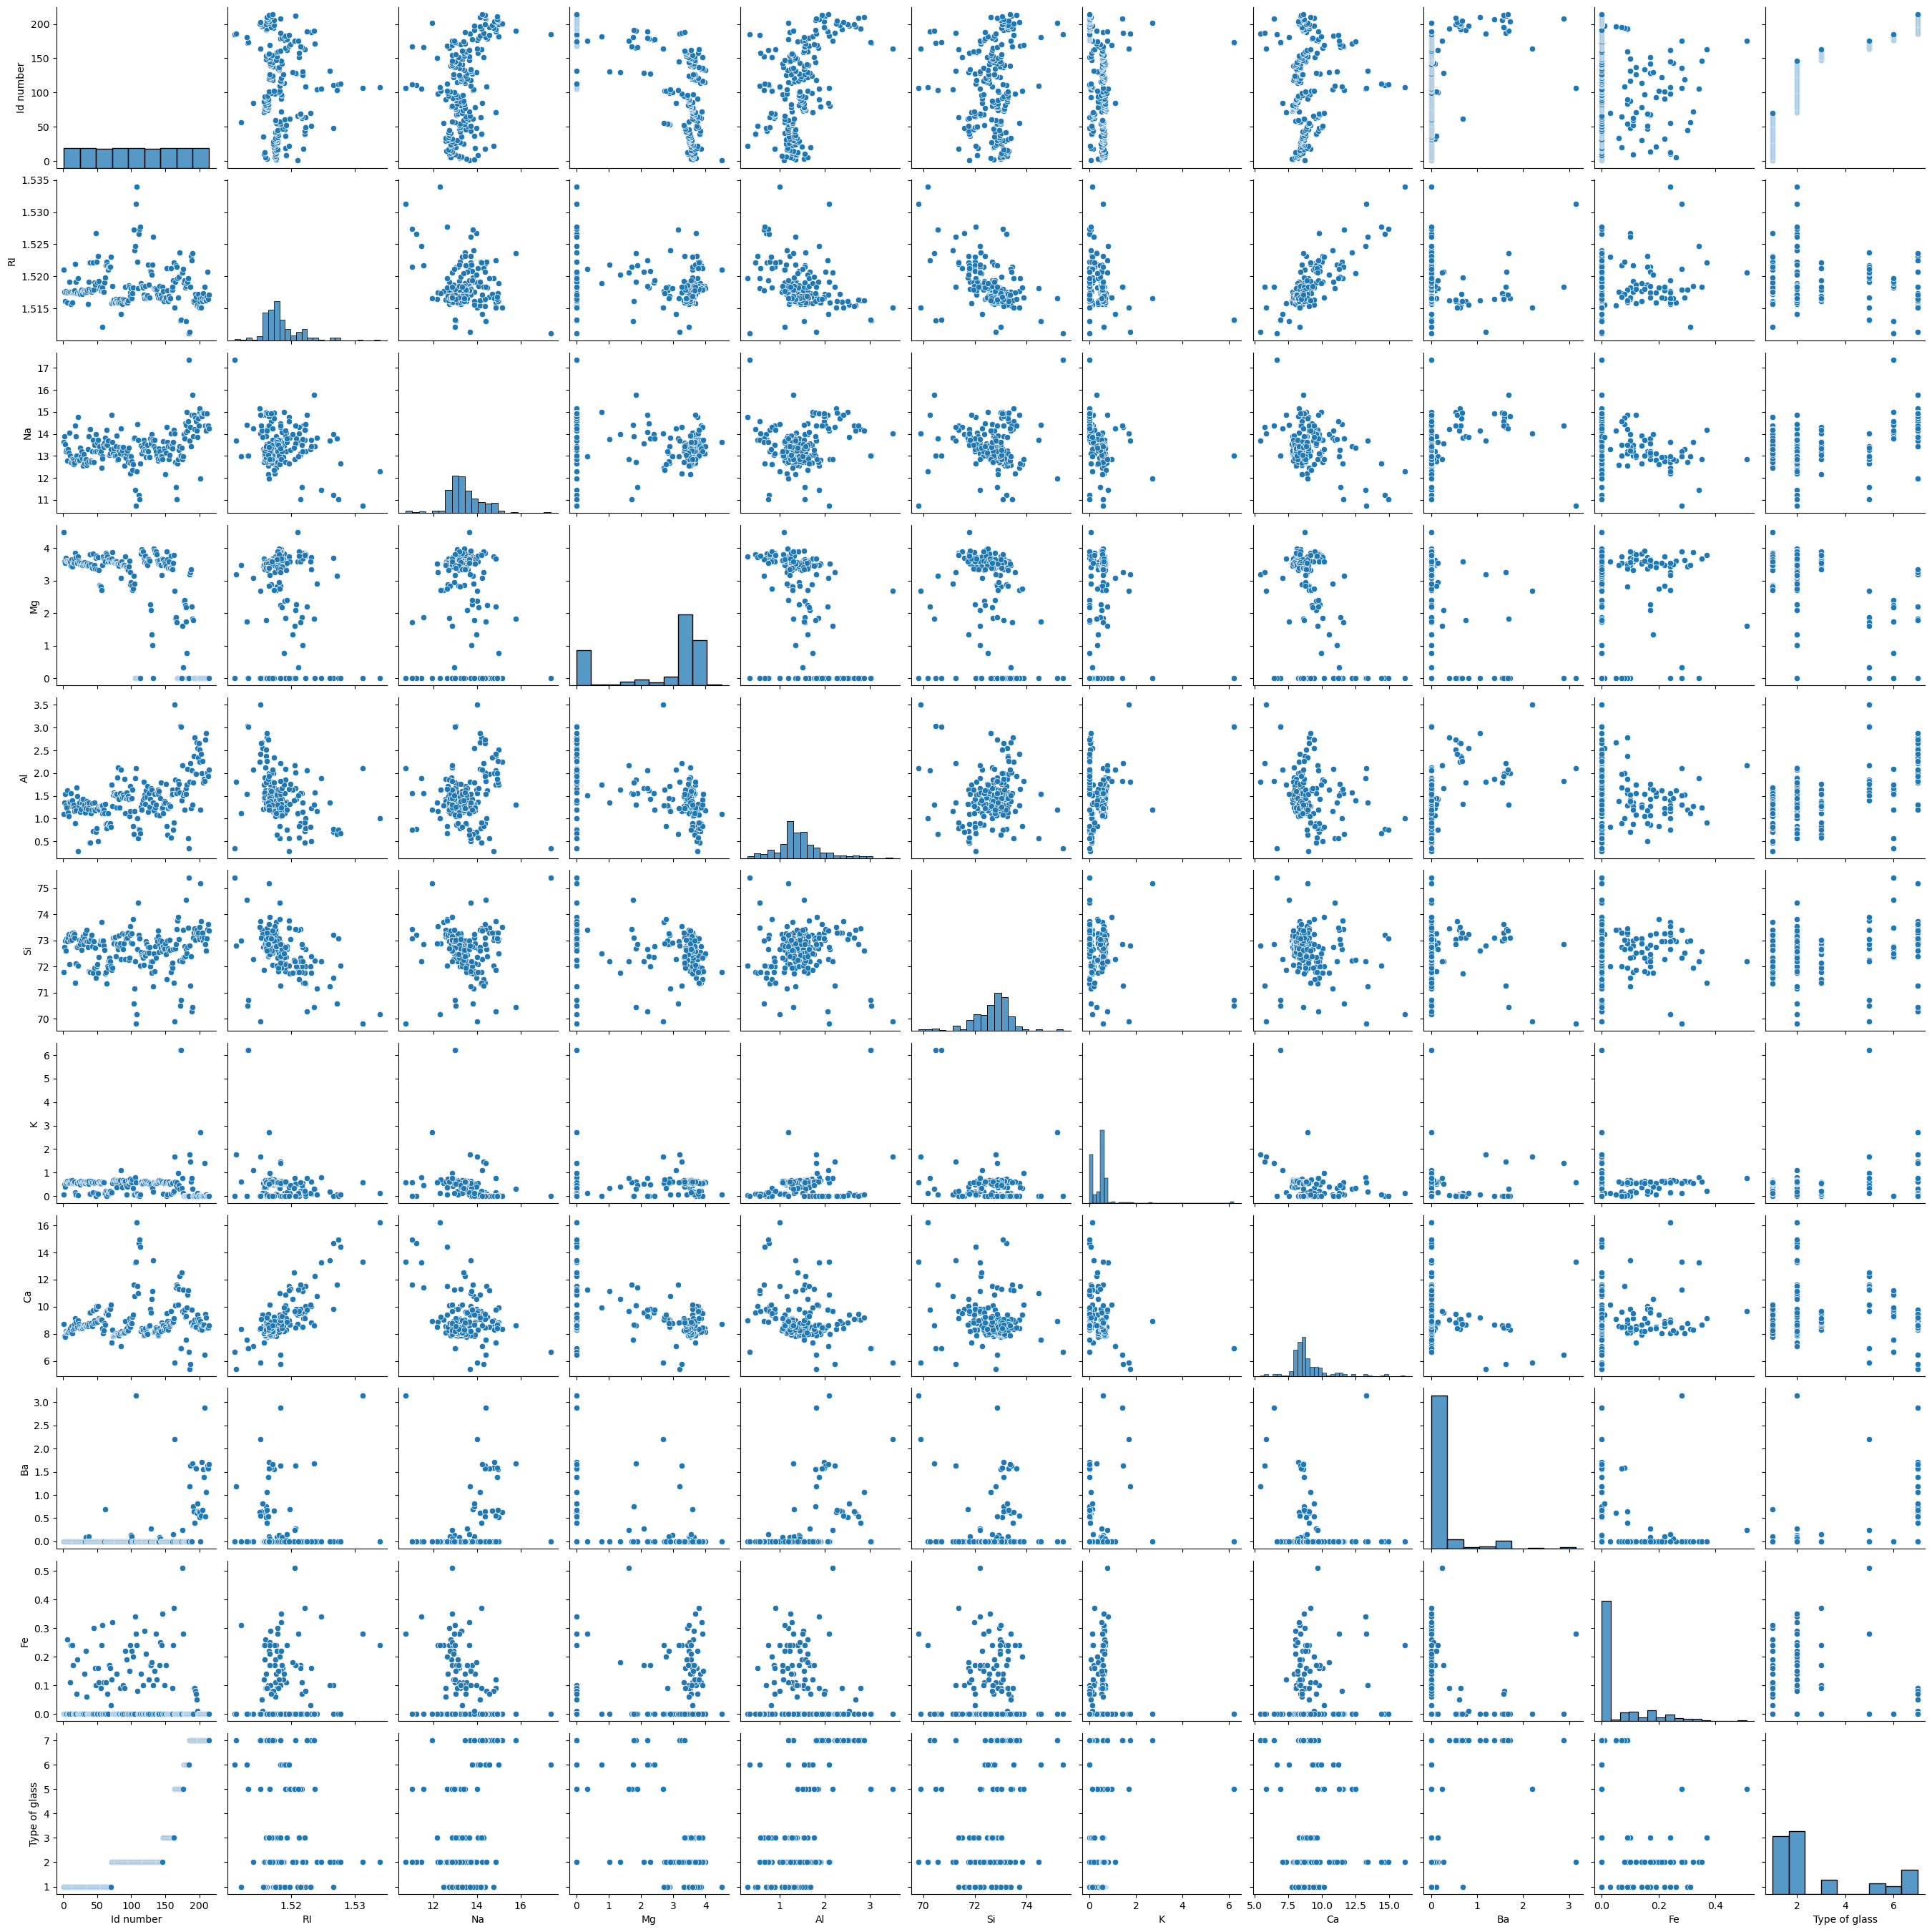

In [274]:
sns.pairplot(gi) 

# Train and Test

In [240]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error
from sklearn.model_selection import train_test_split

from sklearn.naive_bayes import MultinomialNB
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.model_selection import cross_val_score
import warnings
warnings.filterwarnings ('ignore')

In [241]:
x = gi[['Id number','RI','Na','Mg','Al', 'Si', 'K', 'Ca', 'Ba','Fe']]
y = gi['Type of glass']

In [242]:
x.shape

(214, 10)

In [243]:
y.shape

(214,)

In [244]:
y.value_counts()

2    76
1    70
7    29
3    17
5    13
6     9
Name: Type of glass, dtype: int64

In [245]:
#Balancing 
from imblearn.over_sampling import SMOTE
sm=SMOTE()
x,y=sm.fit_resample(x,y)
y.value_counts()

1    76
2    76
3    76
5    76
6    76
7    76
Name: Type of glass, dtype: int64

In [246]:
#Scaling
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
x=scaler.fit_transform(x)
x

array([[-2.48304766,  1.0736475 ,  0.02726342, ..., -0.32689159,
        -0.41550715, -0.47651719],
       [-2.46536396, -0.20889977,  0.29917321, ..., -1.02497032,
        -0.41550715, -0.47651719],
       [-2.44768026, -0.74832407, -0.09237689, ..., -1.06290938,
        -0.41550715, -0.47651719],
       ...,
       [ 1.26589709, -0.42039999,  0.68547047, ..., -0.43627678,
         3.1180141 , -0.47651719],
       [ 1.00064157, -1.07438136,  0.82161828, ..., -0.07679895,
         0.94433912, -0.45297123],
       [ 1.01832527, -0.84944455,  1.48367214, ..., -0.46216301,
         0.94988001, -0.47651719]])

In [247]:
xtrain,xtest,ytrain,ytest=train_test_split(x,y,test_size=0.2,random_state=42)

In [248]:
xtrain.shape

(364, 10)

In [249]:
xtest.shape

(92, 10)

In [250]:
ytrain.shape

(364,)

In [251]:
ytest.shape

(92,)

In [252]:
lm=LinearRegression()
lm.fit(xtrain,ytrain)

LinearRegression()

In [253]:
lm.coef_

array([ 1.31145383,  0.61229516,  1.12612434,  0.90494681,  1.05479846,
        1.08427102,  0.66743839,  0.71641212,  0.31033613, -0.15573235])

In [254]:
lm.intercept_

3.985851906099762

In [255]:
lm.score(xtrain,ytrain)

0.915112735018477

In [256]:
predicted_type_of_glass = list(lm.predict(xtest))
original_type_of_glass = list(ytest)

In [257]:
predicted_df = pd.DataFrame({'predicted_type_of_glass': predicted_type_of_glass, 'original_type_of_glass': original_type_of_glass})
pd.DataFrame(predicted_df)

,predicted_type_of_glass,original_type_of_glass
0,5.273561,6
1,0.619352,1
2,4.904129,5
3,-0.004202,1
4,3.464356,3
...,...,...
87,3.503405,2
88,2.350864,2
89,1.398705,1
90,3.150875,3


In [258]:
gi['Type of glass'] = gi['Type of glass'].astype(int)
print(gi)

     Id number       RI     Na    Mg    Al     Si     K    Ca    Ba   Fe  \
0            1  1.52101  13.64  4.49  1.10  71.78  0.06  8.75  0.00  0.0   
1            2  1.51761  13.89  3.60  1.36  72.73  0.48  7.83  0.00  0.0   
2            3  1.51618  13.53  3.55  1.54  72.99  0.39  7.78  0.00  0.0   
3            4  1.51766  13.21  3.69  1.29  72.61  0.57  8.22  0.00  0.0   
4            5  1.51742  13.27  3.62  1.24  73.08  0.55  8.07  0.00  0.0   
..         ...      ...    ...   ...   ...    ...   ...   ...   ...  ...   
209        210  1.51623  14.14  0.00  2.88  72.61  0.08  9.18  1.06  0.0   
210        211  1.51685  14.92  0.00  1.99  73.06  0.00  8.40  1.59  0.0   
211        212  1.52065  14.36  0.00  2.02  73.42  0.00  8.44  1.64  0.0   
212        213  1.51651  14.38  0.00  1.94  73.61  0.00  8.48  1.57  0.0   
213        214  1.51711  14.23  0.00  2.08  73.36  0.00  8.62  1.67  0.0   

     Type of glass  
0                1  
1                1  
2                1  
3  

In [259]:
predicted_df = pd.DataFrame({'predicted_type_of_glass': predicted_type_of_glass, 'original_type_of_glass': original_type_of_glass})
pd.DataFrame(predicted_df)

,predicted_type_of_glass,original_type_of_glass
0,5.273561,6
1,0.619352,1
2,4.904129,5
3,-0.004202,1
4,3.464356,3
...,...,...
87,3.503405,2
88,2.350864,2
89,1.398705,1
90,3.150875,3


In [260]:
predicted_type_of_glass_int = [int(value) for value in predicted_type_of_glass]
original_type_of_glass_int = [int(value) for value in original_type_of_glass]
predicted_gi = pd.DataFrame({'predicted_type_of_glass': predicted_type_of_glass_int, 'original_type_of_glass': original_type_of_glass_int})
print(predicted_gi)

    predicted_type_of_glass  original_type_of_glass
0                         5                       6
1                         0                       1
2                         4                       5
3                         0                       1
4                         3                       3
..                      ...                     ...
87                        3                       2
88                        2                       2
89                        1                       1
90                        3                       3
91                        0                       1

[92 rows x 2 columns]


In [272]:
def glassidentificationpredict(p):
    p=p.values.reshape(1,-1)
    pred=lm.predict(p)
    print("Predicted Value:",pred)
    if pred==1:
        print("Building windows float processed")
    elif pred==2:
        print("Building windows non float processed")   
    elif pred==3:
        print("Vehicle windows float processed")  
    elif pred==4:
        print("Vehicle windows non float processed")  
    elif pred==5:
        print("Containers")  
    elif pred==6:
        print("Tableware")  
    else: 
        print("Headlamps") 

In [266]:
p=pd.DataFrame({'Id number':[0],
                'RI':[0.51],
                'Na': [0.14],
                'Mg': [0.00],
                'Al': [0.88],
                'Si': [0.01],
                'K': [0.08],
                'Ca':[0.18],
                'Ba':[0.23],
                'Fe':[0]
})
glassidentificationpredict(p)

Predicted Value: [5.64857176]
Headlamps
